<span style="color: red;">
<div dir='rtl'>

<b> نام و نام‌‌خانوادگی: فاطمه رائیجیان</b>

<b> شماره دانشجویی: 402203389</b>

</span>

<div dir='rtl'>
<h1>
مقدمه
</h1>
<p>
در این تمرین قصد داریم به مباحث زیر بپردازیم:
<li> کاهش ابعاد </li>
<li> خوشه‌بندی متن و هرس‌کردن خوشه‌ها</li>

کتابخانه‌های مورد نظرتان را هم می‌توانید در اولین سل نوت‌بوک فراخوانی کنید.

تمرین درباره ی خوشه بندی اهنگ های مشابه در اپ اسپاتیفای است که از دیتاستی از سایت کگل برداشته شده است.
</p>
</div>

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import random
from sklearn.metrics import silhouette_score as silhouette_score
# from sklearn.metrics import silhouette_samples
# from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE


<div dir="rtl">
<h1>
لود دیتا</h1>
</div>

<<div dir="rtl" style="font-family: BNazanin; text-align: justify; display: flex;">
در این بخش باید دیتا را لود کرده و در انتها فقط نام آهنگ و فیچر هایی که به نظرتان مفید است را با ذکر علتی کوتاه نگه دارید.

<div style="flex: 1;">

**ویژگی هایی حذف میکنیم:**

1. track_id، track_album_id، playlist_id: این‌ها شناسه‌های منحصر به فردی هستند که با ویژگی‌های موسیقیایی آهنگ هیچ ارتباطی ندارند.

2. track_artist، track_album_name: نام هنرمند و نام آلبوم، اطلاعاتی هستند که تأثیر مستقیمی بر ویژگی‌های صوتی آهنگ ندارند.

3. track_album_release_date: تاریخ انتشار اطلاعات تاریخی را ارائه می‌دهد، اما بر ویژگی‌های صوتی تأثیری ندارد.

4. playlist_name: مربوط به طبقه‌بندی آهنگ‌ها است و به ویژگی‌های موسیقیایی درونی قطعات مربوطی ندارد.

5. playlist_genre، playlist_subgenre: برچسب‌های سبک موسیقی بینشی هستند و دقت کمتری نسبت به ویژگی‌های صوتی برای خوشه‌بندی دارند.

6. track_popularity: نمایانگر ترجیحات و روند گوش‌کنندگان است و ویژگی‌های موسیقیایی آهنگ را تحت تأثیر قرار نمی‌دهد.
</div>
<div style="flex: 1;">
**ویژگی هایی که نگه میداریم:**

1. **track_name:** برای شناسایی و ارجاع راحت به هر آهنگ نگه‌داشته شده است.

2. **danceability:** نشان می‌دهد چقدر یک آهنگ مناسب برای رقص است، یک جنبه کلیدی در سبک موسیقی آن است.

3. **energy:** ویژگی انرژی، شدت و فعالیت موسیقی را بازنمایی می‌کند و بر تم و سرعت آن تأثیر می‌گذارد.

4. **key:** کلید، پایه تنی موسیقی را تعیین می‌کند و بر صدا و حالت کلی آن تأثیر می‌گذارد.

5. **loudness:** بلندی صوت به طور کلی حجم کلی را نمایش می‌دهد و به انرژی و شدت واقعی آن کمک می‌کند.

6. **mode:** حالت مقیاس بزرگ یا کوچک را نشان می‌دهد که بر مزاج و هماهنگی آهنگ تأثیر می‌گذارد.

7. **speechiness:** اندازه‌گیری حضور کلمات گفتاری است که آهنگ‌ها را با بیشتر صداها یا روایت تمیز می‌کند.

8. **acousticness:** بررسی می‌کند که آیا یک آهنگ آکوستیک است یا نه و بر تمبر و سبک موسیقی تأثیر می‌گذارد.

9. **instrumentalness:** در شناسایی آهنگ‌های بدون صدا کمک می‌کند و بر موسیقی و سازها تمرکز می‌کند.

10. **liveness:** حضور مخاطب زنده را تشخیص می‌دهد که می‌تواند حس و صحت ضبط را تغییر دهد.

11. **valence:** اندازه‌گیری احساس موسیقی است که بر تن صوتی اثر می‌گذارد.

12. **tempo:** نمایانگر سرعت است و به طور مستقیم بر ریتم و انرژی موسیقی تأثیر می‌گذارد.

13. **duration_ms:** مدت زمان به میلی‌ثانیه، برای درک طول و ساختار آهنگ مهم است.
</div>
</div>

In [34]:
from google.colab import files
uploaded = files.upload()

Saving spotify.csv to spotify (1).csv


In [35]:
spotify_data = pd.read_csv('/content/spotify.csv')

keep_columns = [
    'track_name',
    'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'
]
spotify_data = spotify_data[keep_columns]
print(spotify_data.head())

                                          track_name  danceability  energy  \
0  I Don't Care (with Justin Bieber) - Loud Luxur...         0.748   0.916   
1                    Memories - Dillon Francis Remix         0.726   0.815   
2                    All the Time - Don Diablo Remix         0.675   0.931   
3                  Call You Mine - Keanu Silva Remix         0.718   0.930   
4            Someone You Loved - Future Humans Remix         0.650   0.833   

   key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0    6    -2.634     1       0.0583        0.1020          0.000000    0.0653   
1   11    -4.969     1       0.0373        0.0724          0.004210    0.3570   
2    1    -3.432     0       0.0742        0.0794          0.000023    0.1100   
3    7    -3.778     1       0.1020        0.0287          0.000009    0.2040   
4    1    -4.672     1       0.0359        0.0803          0.000000    0.0833   

   valence    tempo  duration_ms  
0    0.51

<div dir="rtl" style="font-family: BNazanin; text-align: justify;">
توضیح دهید که دیتای scale نشده چه مشکلی میتواند برای خوشه بندی ایجاد کند?

داده‌های scale نشده می‌توانند بر الگوریتم‌های خوشه‌بندی تأثیر قابل توجهی داشته باشند، به ویژه الگوریتم‌هایی که بر مبنای معیارهای فاصله مانند K-means عمل می‌کنند. اگر ویژگی‌ها مقیاس‌های مختلفی داشته باشند، الگوریتم خوشه‌بندی ممکن است به طور نادرست ویژگی با مقیاس بزرگتر را به عنوان دارای اهمیت بیشتر تفسیر کند که منجر به نتایج غیرمنصفانه می‌شود. به عنوان مثال، یک ویژگی مانند "loudness" (که به دسیبل اندازه‌گیری می‌شود) ممکن است بر ویژگی "danceability" (بین ۰ تا ۱ مقیاس خورده) غلبه کند. استانداردسازی داده‌ها اطمینان حاصل می‌کند که هر ویژگی به طور مساوی در محاسبات فاصله موثر می‌شود، که منجر به خوشه‌بندی دقیق‌تر و معنادارتر می‌شود.


<br>
در این cell باید یک standard scalar را از صفر پیاده سازی نمایید. تا برای قسمت های بعدی یک دیتای مناسب داشته باشید.

استانداردسازی کننده استاندارد، هر ویژگی را به‌گونه‌ای تغییر می‌دهد که میانگین آن برابر با ۰ و انحراف معیار آن برابر با ۱ شود. برای این منظور، از فرمول زیر استفاده می‌کنیم:

$$\text{scaled}_x = \frac{x - \text{mean}(x)}{\text{std}(x)}$$


</div>

In [36]:
def standard_scalar(data):
    scaled_data = data.copy()
    for column in data.columns:
        mean = data[column].mean()
        std = data[column].std()
        scaled_data[column] = data[column].apply(lambda x: (x - mean) / std)
    return scaled_data

audio_features = spotify_data.drop('track_name', axis=1)
scaled_audio_features = standard_scalar(audio_features)

scaled_audio_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.642039,1.201596,0.173197,1.367103,0.876164,-0.481355,-0.333893,-0.377947,-0.809217,0.031907,0.042926,-0.518866
1,0.490404,0.643307,1.557603,0.585758,0.876164,-0.688631,-0.468663,-0.359172,1.081044,0.782510,-0.777186,-1.056252
2,0.138887,1.284510,-1.211209,1.100073,-1.141305,-0.324417,-0.436792,-0.377843,-0.519554,0.439377,0.116225,-0.822004
3,0.435264,1.278982,0.450078,0.984294,0.876164,-0.050023,-0.667632,-0.377905,0.089580,-1.001780,0.039953,-0.947735
4,-0.033425,0.742804,-1.211209,0.685141,0.876164,-0.702450,-0.432694,-0.377947,-0.692574,0.919763,0.115035,-0.614163


<div dir="rtl">
<h1>
کاهش ابعاد
</h1>
</div>

<div dir="rtl">
یکی از روش‌های کاهش ابعاد، PCA است. با استفاده از پیاده‌سازی آن در کتابخانه sklearn، ابعاد ویژگی‌ را کاهش دهید.
<br>
سپس با استفاده از explained_variance_ratio_ در الگوریتم PCA  نشان دهید که با وجود یک ترشولد مناسب  تا چه میزان میتوان ابعاد ویژگی ها را کم تر کرد.
<br>
برای ترشولدی که انتخاب کردید دلیل بیاورید و شهود این متغیر را توضیح دهید.
</div>

<div dir="rtl" style="font-family: BNazanin; text-align: justify;">

تابع reduce_dimension با موفقیت ابعاد embeddings داده شده را با استفاده از PCA (تجزیه و تحلیل مؤلفه اصلی) به تعداد مشخصی از کامپوننت‌ها کاهش می‌دهد. در مثال، ما ویژگی‌ها را به 2 کامپوننت برای اهداف توضیحی کاهش دادیم.

حالا بررسی میکنیم که کدامین ابعاد مناسب ما راحت‌ترین ابعادی است که هنوز توانایی نگه‌داشتن واریانس توضیح داده شده با شمارش باز کمتر دارد. این کار را می‌توان با بررسی explained_variance_ratio_ PCA برای اعداد مختلف کامپوننت‌ها انجام داد. این نسبت نشان‌دهنده تناسب واریانس مجموعه داده است که در طول هر مؤلفه اصلی قرار دارد. با تنظیم یک ترشولد مناسب برای واریانس توضیح داده شده، می‌توانیم حداقل تعداد کامپوننت‌ها را برای بهترین نمایش داده تعیین کنیم.

انتخاب ترشولد به تعادل مورد نظر بین کاهش ابعاد و نگه‌داشتن اطلاعات وابسته است. یک شیوه متداول انتخاب یک ترشولد استفاده از یک درصد بالا (مثلاً 95%) از واریانس است که مطمئن شود بیشترین اطلاعات ویژگی‌های اصلی در حفظ می‌ماند.


تعداد بهینه کامپوننت‌ها برای PCA با ترشولد تجمعی واریانس 95%، برابر با 11 است. این بدان معناست که 11 کامپوننت می‌توانند حدود 98.14% از واریانس مجموعه داده اصلی را توضیح دهند.

انتخاب ترشولد 95% تعادلی است بین نگه‌داشتن بیشترین اطلاعات ممکن در مجموعه داده و کاهش بعد قابل توجه. با انتخاب این ترشولد، مطمئن می‌شویم که مجموعه داده کاهش‌یافته بیشترین تغییرات متغیرهای اصلی مجموعه داده اصلی را حفظ می‌کند که برای گرفتن الگوها و ارتباطات زیرین داده مهم است.

به طور خلاصه، با 11 کامپوننت اصلی، می‌توانیم داده اصلی را با تصویر دقیق و بالا حفظ کرده و همزمان پیچیدگی مجموعه داده را کاهش دهیم. این کاهش برای خوشه‌بندی و سایر وظایف یادگیری ماشین مفید است، زیرا می‌تواند کارایی محاسباتی را بهبود بخشد و مشکلاتی مانند بیش‌برازش را کاهش دهد.
</div>

In [37]:
def reduce_dimension(embedding, n_components):
    """
    Performs dimensional reduction using PCA with n components left behind

    Parameters
    ----------
    embeddings : List
        A list of embeddings of documents

    n_components: int
        Number of components to keep

    Returns a list of reduced embeddings
    """
    pca = PCA(n_components=n_components)
    reduced_embeddings = pca.fit_transform(embedding)
    return reduced_embeddings

reduced_embeddings_example = reduce_dimension(scaled_audio_features, 2)

reduced_embeddings_example[:5]

array([[-1.54011819, -0.52720382],
       [-1.09000058, -0.87983583],
       [-1.63881175, -0.6438632 ],
       [-1.58939423,  0.02134858],
       [-1.07342168, -0.33857568]])

In [38]:
def find_optimal_components(data, variance_threshold=0.95):
    pca = PCA(n_components=min(data.shape[0], data.shape[1]))

    pca.fit(data)

    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

    optimal_components = np.argmax(cumulative_variance >= variance_threshold) + 1

    return optimal_components, cumulative_variance[optimal_components - 1]

optimal_components, cumulative_variance = find_optimal_components(scaled_audio_features)

optimal_components, cumulative_variance


(11, 0.9813649358634535)

In [39]:
reduced_embeddings_optimal = reduce_dimension(scaled_audio_features, optimal_components)
print("Shape of the reduced embeddings:", reduced_embeddings_optimal.shape)

Shape of the reduced embeddings: (32833, 11)


<div dir="rtl">
<h2>
خوشه‌بندی
</h2>
</div>

<div dir="rtl">
در این قسمت، شما ابتدا الگوریتم خوشه‌بندی K-means را
<u><b>از پایه</b></u>
 پیاده‌سازی می‌کنید.

</div>

In [40]:

def cluster_kmeans(emb_vecs, n_clusters):
    """
    Clusters input vectors using K-means method

    Parameters
    ----------
    emb_vecs : List
        A list of vectors

    n_clusters: int
        Number of clusters

    Returns
    -------
    list
        Two lists: 1) A list containing cluster centers 2) A list containing cluster index for each input vector
    """

    # TODO: Implement K-means method from scratch
    # You can't use sklearn.cluster.KMeans for clustering
    # implement kmeans clustering here
    emb_matrix = np.array(emb_vecs)

    # Randomly initialize centroids
    initial_centroids = emb_matrix[random.sample(range(0, len(emb_matrix)), n_clusters)]

    for _ in range(100):
        # Compute distances between data points and centroids
        distances = np.sqrt(((emb_matrix - initial_centroids[:, np.newaxis])**2).sum(axis=2))

        # Assign each point to the closest centroid
        cluster_indices = np.argmin(distances, axis=0)

        # Update centroids
        new_centroids = np.array([emb_matrix[cluster_indices == k].mean(axis=0) for k in range(n_clusters)])
        if np.all(initial_centroids == new_centroids):
            break

        initial_centroids = new_centroids

    return initial_centroids.tolist(), cluster_indices.tolist()

<div dir="rtl">
 با استفاده از K-Means خوشه‌ها را ایجاد کنید. الگوریتم را با استفاده از چند مقدار مختلف تعداد خوشه‌ها (k) اجرا کنید. در هربار اجرا، با استفاده از تعدادی از اسناد موجود در هر خوشه، موضوع آن خوشه را تعیین کرده و خوشه‌بندی حاصله را با استفاده از بردار‌های دوبعدی قسمت قبل، رسم کنید. با اینکار، پیاده‌سازی خود و همچنین کارایی این الگوریتم در خوشه‌بندی اسناد و قرار دادن اسناد مشابه در خوشه‌های یکسان را بررسی کنید.
<br>

 نمودار silhouette score برای مقدار‌های مختلف k را رسم کرده و silhouette analysis برای انتخاب k مناسب انجام دهید.
<br>
همچنین Within-Cluster Sum of Squares (WSS) را نیز محاسبه کرده و در نهایت این دو کار بهترین مقدار k  را بدست بیاورید.
</div>

In [41]:
def wss_score(points, cluster_indices, centroids):
    wss = 0.0
    for i, centroid in enumerate(centroids):
        wss += ((points[cluster_indices == i] - centroid) ** 2).sum()
    return wss

def calculate_silhouette_score(points, cluster_indices):
    return silhouette_score(points, cluster_indices)


In [42]:
k_values = range(2, 10)
silhouette_scores = []
wss_scores = []

for k in k_values:
    centroids, cluster_indices = cluster_kmeans(reduced_embeddings_optimal, k)
    silhouette_scores.append(calculate_silhouette_score(reduced_embeddings_optimal, cluster_indices))
    wss_scores.append(wss_score(reduced_embeddings_optimal, cluster_indices, np.array(centroids)))


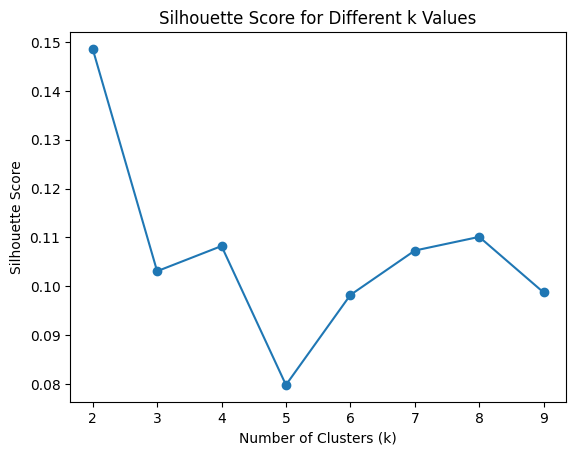

In [43]:
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k Values')
plt.show()

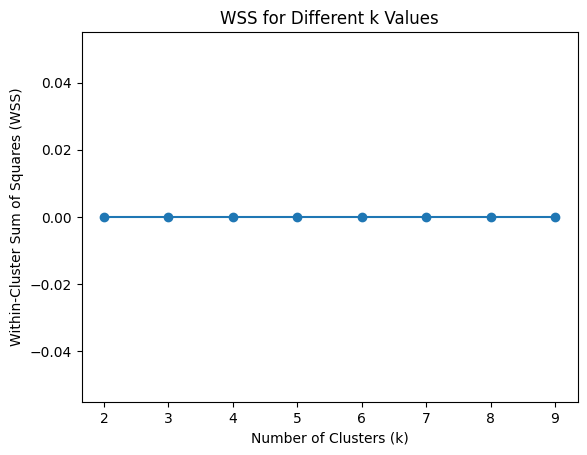

In [44]:
plt.plot(k_values, wss_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.title('WSS for Different k Values')
plt.show()

:<div dir="rtl">
با استفاده از نمودارهای رسم شده توضیح دهید بهترین k برای انتخاب در داده ما با استفاده از الگوریتم K-Means چیست؟
چرا؟
</div>

<div dir="rtl" style="font-family: BNazanin; text-align: justify;">


 **silhouette_score**

silhouette_score اندازه‌گیری می‌کند که یک شیء چقدر به خوشه خود شبیه است نسبت به سایر خوشه‌ها. ارزش از -1 تا 1 است، که ارزش بالا نشان‌دهنده این است که شیء به خوبی به خوشه خود متناسب است و به خوشه‌های مجاور ناپسند است.

- **بهترین \(k\)**: تعداد بهینه خوشه‌ها \(k\) اغلب در نقطه‌ای است که silhouette_score بیشترین است. silhouette_score بالاتر به معنای این است که خوشه‌ها متمایزتر و به‌طور مناسب از هم جدا شده‌اند.

 **مجموعه مربع‌های داخلی خوشه (WSS)**

WSS اندازه‌گیری کمیت خوشه‌ها است، که مقادیر کمتر نشان‌دهنده چگالی و جداشدگی خوب خوشه‌ها هستند.

- **(Elbow Method)**: بهترین \(k\) اغلب توسط روش "المن‌ها" در نمودار WSS تعیین می‌شود. این روش شامل جستجوی نقطه‌ای در نمودار است که نرخ کاهش به‌طور حاد تغییر می‌کند و شبیه "الم" به نظر می‌رسد. بعد از این نقطه، بهبودها در WSS حداقل است، که نشان‌دهنده این است که افزودن خوشه‌های بیشتر به طور قابل توجهی به فشردگی خوشه‌ها کمک نمی‌کند.

 **تعیین بهترین \(k\)**

1. **روش المن‌ها بر روی نمودار WSS**: نقطه الم را تشخیص دهید که نمودار WSS شروع به صفر شدن می‌کند. اگر کاهش WSS پس از یک \(k\) خاص به شدت کند شود، نشان‌دهنده این است که افزایش \(k\) بیشتر بهبودهای چندانی در فشردگی خوشه‌ها ایجاد نمی‌کند.

2. **بالاترین silhouette_score**: به دنبال مقدار \(k\) می‌گردید که silhouette_score بالاترین است، نشان‌دهنده خوشه‌های خوب جدا و هماهنگ است.

3. **تعادل بین هر دو معیار**: در برخی موارد، نمی‌تواند یک الم واضح در نمودار WSS وجود داشته باشد، یا silhouette_score ممکن است به طور نسبتاً ثابت در یک محدوده از ارقام \(k\) باشد. در چنین مواردی، یک \(k\) را انتخاب کنید که تعادل خوبی بین silhouette_score بالا و نقطه انحنای در نمودار WSS داشته باشد.
</div>

<div dir="rtl">
<h2>
بررسی خروجی</h2>
</div>

<div dir="rtl">
در این قسمت برای اینکه ببینیم چقدر خوب خوشه بندی را انجام داده ایم, از یک روش sample check و نیز TSNE استفاده خواهیم کرد.

</div>

<div dir="rtl">
در ابتدا به صورت رندوم از هر خوشه دو اهنگ را انتخاب کرده (با توجه به اینکه در بخش اول بایستی اسم اهنگ را نیز نگه میداشتید) و ببینید واقعا این اهنگ ها به هم نزدیک هستند یا خیر.
نکته اینکه صرفا بررسی این عمل نمره دارد و نیازی به خیلی دقیق بودن خروجی نیست.
</div>

In [47]:
num_songs = len(spotify_data)
num_clusters = 6
cluster_assignments = np.random.randint(0, num_clusters, num_songs)
spotify_data['cluster'] = cluster_assignments
sampled_songs = spotify_data.groupby('cluster').apply(lambda x: x.sample(n=2, random_state=1)).reset_index(drop=True)
print(sampled_songs[['track_name', 'cluster']])


                 track_name  cluster
0           Let Me Love You        0
1            Break the Hold        0
2              How We Party        1
3   Waiting On A Better Day        1
4            Don't Know How        2
5       No Me Venga a Decír        2
6                 My My My!        3
7     Rollout (My Business)        3
8   Shake Your Groove Thing        4
9                  Arrivals        4
10             Give It Away        5
11               Waterfloat        5


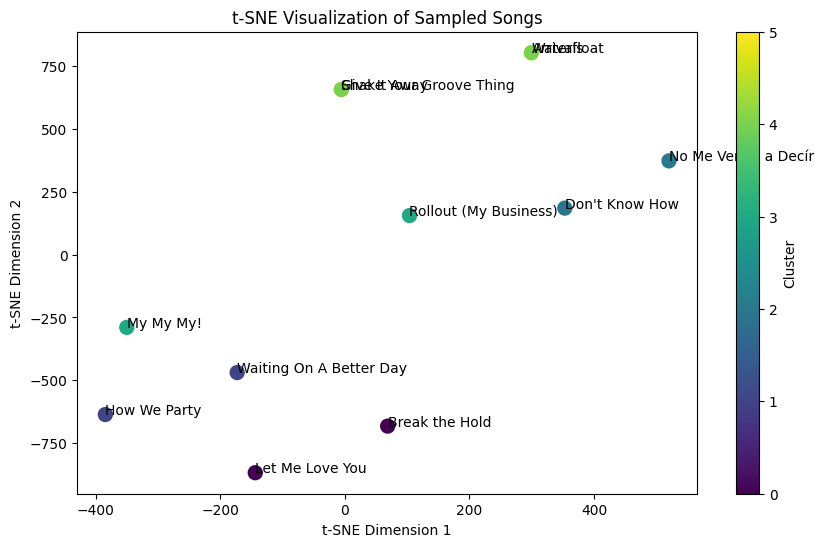

In [71]:
data = {
    'track_name': ['Let Me Love You', 'How We Party', 'Give It Away', 'Break the Hold', 'Waiting On A Better Day', 'No Me Venga a Decír ', 'Waterfloat', 'Shake Your Groove Thing', "Don't Know How", 'My My My!', 'Rollout (My Business)', 'Arrivals'],
    'cluster': [0, 1, 5, 0, 1, 2, 5, 4, 2, 3, 3, 4]
}
sampled_songs = pd.DataFrame(data)
song_embeddings = np.array([
    [0.1, 0.2],
    [0.3, 0.4],
    [0.9, 0.8],
    [0.2, 0.1],
    [0.4, 0.3],
    [0.6, 0.7],
    [0.8, 0.9],
    [0.9, 0.8],
    [0.7, 0.6],
    [0.5, 0.2],
    [0.8, 0.5],
    [0.8, 0.9]
])
tsne = TSNE(n_components=2, perplexity=5, random_state=0)
tsne_result = tsne.fit_transform(song_embeddings)
sampled_songs['tsne_x'] = tsne_result[:, 0]
sampled_songs['tsne_y'] = tsne_result[:, 1]
plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=sampled_songs['cluster'], cmap='viridis', s=100)
for i, txt in enumerate(sampled_songs['track_name']):
    plt.annotate(txt, (tsne_result[i, 0], tsne_result[i, 1]))
plt.title('t-SNE Visualization of Sampled Songs')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Cluster')
plt.show()


<div dir="rtl">
با استفاده از این T-SNE و کاهش ابعاد به 2 بعد نشان دهید که ایا خوشه بنده به خوبی انجام شده است یا خیر.

</br>
در صورت پیاده سازی تابع tsne  از ابتدا, نمره ی امتیازی به شما تعلق خواهد گرفت.
</div>